In [3]:
#import libs, load data

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_load = pd.read_csv('https://nthu-datalab.github.io/ml/labs/02_EDA_PCA/gen_dataset.csv')

X_load = df_load.drop('Class label', 1)
Y_load = df_load['Class label']

df_load.head()

,Class label,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15
0,2.0,-0.016488,-1.310538,-1.552489,-0.785475,1.548429,0.476687,1.090010,-0.351870,-0.000855,-1.932941,0.499177,0.149137,-0.640413,-0.782951,-0.903561
1,0.0,-0.844201,-1.235142,-0.624408,1.502470,-0.079536,1.482053,1.178544,-1.150090,-1.040124,-1.041435,0.281037,-0.283710,-1.176802,0.718408,-0.392095
2,0.0,-0.181053,0.039422,-0.307827,0.162256,-1.283705,0.541288,0.019113,-0.470718,-1.045754,0.983150,-0.121205,-0.189225,-0.539178,0.825261,0.612889
3,2.0,-0.423555,-1.598754,1.597206,-0.239330,1.443564,2.657538,1.824393,-1.809287,1.058634,-4.058539,0.255908,-0.952422,-0.315551,1.854246,-2.369018
4,2.0,-0.499408,-0.814229,-0.178777,-1.757823,0.678134,3.552825,1.483069,-2.341943,2.155062,-4.380612,-0.239352,-1.730919,0.586125,3.902178,-2.891653


In [6]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Z-normalize data
sc = StandardScaler()
Z = sc.fit_transform(X_load)
# Estimate the correlation matrix
R = np.dot(Z.T, Z) / df_load.shape[0]

#calculate the eigen values, eigen vectors
eigen_vals, eigen_vecs = np.linalg.eigh(R)

# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(reverse=True)

#form the projection matrix
W_2D = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
W_3D = np.hstack(( eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis],
               eigen_pairs[2][1][:, np.newaxis] ))

print('Projection matrix W_3D:\n', W_3D)
#you should form a projection matrix which projects from raw-data dimension to 3 dimension here

Projection matrix W_3D:
 [[-3.68010815e-02  3.98101886e-02  1.12149233e-01]
 [-3.53443624e-01  1.75469148e-01 -1.54855864e-02]
 [-4.69345371e-02 -3.87164432e-02  1.15504424e-01]
 [-3.53706763e-02 -1.93184013e-01 -5.02034491e-04]
 [ 2.51841266e-01  2.95837395e-03  5.37399708e-01]
 [ 3.47900935e-01  1.20343211e-01 -2.01164217e-01]
 [ 3.66365130e-01 -9.40241890e-02 -6.92304185e-03]
 [-3.48393864e-01 -6.67711034e-02  2.35753812e-01]
 [-9.57558272e-02  4.42162391e-01  4.19914765e-01]
 [-3.40037462e-01 -1.34354220e-01 -2.38706399e-01]
 [ 3.08457141e-01 -2.99369426e-01  1.38914486e-01]
 [-1.80576614e-01 -4.66154573e-01  2.21961105e-01]
 [-2.73675663e-01  3.40208969e-01  2.31444561e-01]
 [ 1.02075497e-01  4.50994136e-01 -3.97382399e-01]
 [-3.03878959e-01 -2.47786002e-01 -2.74946302e-01]]


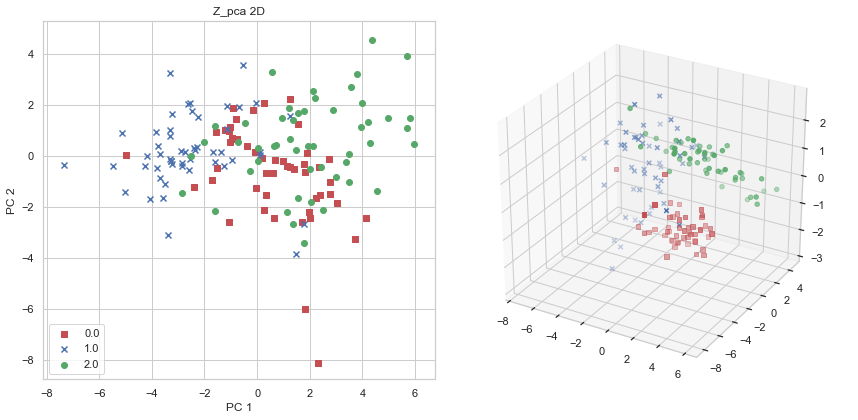

In [16]:
import os
import seaborn as sns
sns.set(style='whitegrid', context='notebook')

#import Axes3D for plottin 3d scatter
from mpl_toolkits.mplot3d import Axes3D

#cacculate z_pca(2d and 3d)
Z_pca2 = Z.dot(W_2D)
Z_pca3 = Z.dot(W_3D)

#plot settings
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
fig = plt.figure(figsize=(12,6))

#plot 2D
plt2 = fig.add_subplot(1,2,1)
for l, c, m in zip(np.unique(Y_load), colors, markers):
    plt2.scatter(Z_pca2[Y_load==l, 0], 
                Z_pca2[Y_load==l, 1], 
                c=c, label=l, marker=m)

plt.title('Z_pca 2D')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()

#plot 3D
plt3 = fig.add_subplot(1,2,2, projection='3d')
for l, c, m in zip(np.unique(Y_load), colors, markers):
    plt3.scatter(Z_pca3[Y_load==l, 0], 
                Z_pca3[Y_load==l, 1],
                Z_pca3[Y_load==l, 2],
                c=c, label=l, marker=m)
#you should plot a 3D scatter using plt3.scatter here (see Axes3D.scatter in matplotlib)

if not os.path.exists('./output'):
    os.makedirs('./output')
plt.savefig('./output/fig-pca-2-3-z.png', dpi=300)
plt.show()